
# Classification of benign or malignant lesions based on **WDBS – Dataset** using **Various models**

---



## Install datapackage

In [1]:
%pip install datapackage


**1. Collection and preparation of the dataset**

## 1. Collection and preparation of the dataset

### 1.1 Collection of the dataset

In [2]:
import datapackage
import pandas as pd
#https://datahub.io/machine-learning/wdbc
data_url = 'https://datahub.io/machine-learning/wdbc/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)


### 1.2 Preparation of the dataset

In [3]:
# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])

y = pd.DataFrame()
y['Class'] = data['Class']
data.drop(labels='Class', axis=1, inplace=True)
X = data
kolumny = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10",
           "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20",
           "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30"]


X = X.to_numpy()
y = y.to_numpy()
y = y.ravel()

print(y)
print(X)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2 2 1 2 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 2 2
 1 2 1 2 2 1 1 1 2 2 1 2 2 2 1 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1
 1 1 1 1 1 1 2 2 2 1 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1 2 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 2 1 1 2 2 1 1 2 2 1 1 1 1 2 1 1 2 2 2 1 2
 1 2 1 1 1 2 1 1 2 2 1 2 2 2 2 1 2 2 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 2 2 1 1
 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 2 2 2 1 1
 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2
 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1
 2 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 2 1 2 1 1 2 

### 1.3 Data split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## SGDClassifier

### 2.1 Training the model

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [6]:
y_pred_sgd = sgd_clf.predict(X_test)

### 2.2 Calculation of metrics

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)

precision_sgd = precision_score(y_test, y_pred_sgd)

recall_sgd = recall_score(y_test, y_pred_sgd)

f1_score_sgd = f1_score(y_test, y_pred_sgd) # Harmonic mean of precision and fullness

confusion_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)




### 2.3 Results of metrics

In [8]:
print(f'Accuracy of sgd model: {accuracy_sgd}')
print(f'Sgd model precision: {precision_sgd}')
print(f'Sgd model recall: {recall_sgd}')
print(f'F1 model sgd: {f1_score_sgd}')

Accuracy of sgd model: 0.956140350877193
Sgd model precision: 0.9583333333333334
Sgd model recall: 0.971830985915493
F1 model sgd: 0.965034965034965


### 2.4 Confusion Matrix

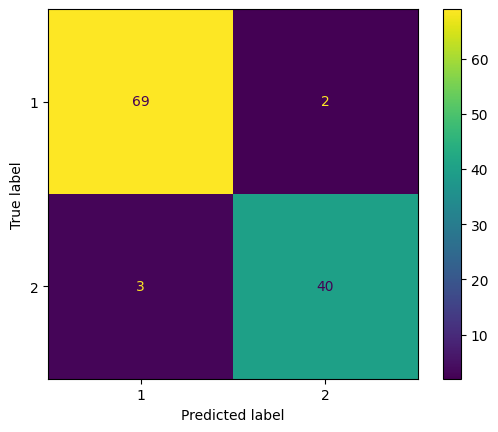

In [9]:
disp_sgd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_sgd, display_labels=sgd_clf.classes_)
disp_sgd.plot()
plt.show()

### 2.5 Cross Val Score

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.92763158, 0.72368421, 0.88741722])

In [11]:
some_digit = X[0]
y_scores = sgd_clf.decision_function([some_digit]) # Decision result
print(f'Wynik decyzyjny: {y_scores}')
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(f'Wynik: {y_some_digit_pred}')

Wynik decyzyjny: [5551936.56111038]
Wynik: [ True]


### 2.6 ROC curve

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Probability of belonging to a class
y_prob_sgd = sgd_clf.predict_proba(X_test)[:, 1]
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_pred_sgd, pos_label=2)


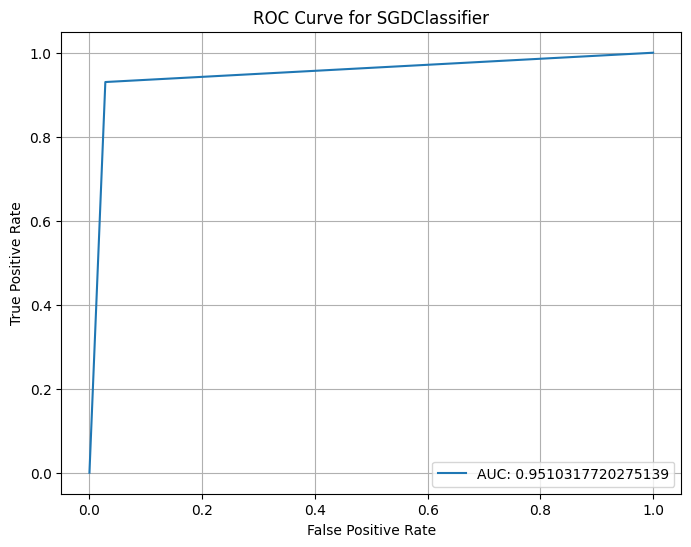

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, label=f'AUC: {auc(fpr_sgd, tpr_sgd)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SGDClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 2.7  Precision Recall Curve

In [14]:
from sklearn.metrics import precision_recall_curve
precision_sgd, recall_sgd, _ = precision_recall_curve(y_test, y_prob_sgd, pos_label=2)

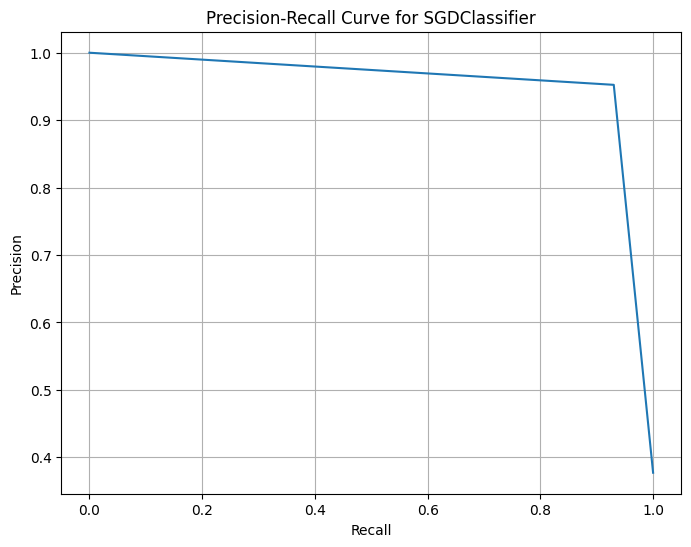

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(recall_sgd, precision_sgd)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SGDClassifier')
plt.grid()
plt.show()

## Random Forest Classifier

### 3.1 Training the model

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred_forest = forest_clf.predict(X_test)

### 3.2 Calculation of metrics

In [18]:
accuracy_forest = accuracy_score(y_test, y_pred_forest)

precision_forest = precision_score(y_test, y_pred_forest)

recall_forest = recall_score(y_test, y_pred_forest)

f1_score_forest = f1_score(y_test, y_pred_forest)

confusion_matrix_forest = confusion_matrix(y_test, y_pred_forest)



### 3.3 Result of metrics

In [19]:
print(f'Accuracy of rfc model: {accuracy_sgd}')
print(f'Rfc model precision: {precision_sgd}')
print(f'Rfc model recall: {recall_sgd}')
print(f'F1 model rfc: {f1_score_sgd}')

Accuracy of rfc model: 0.956140350877193
Rfc model precision: [0.37719298 0.95238095 1.        ]
Rfc model recall: [1.         0.93023256 0.        ]
F1 model rfc: 0.965034965034965


### 3.4 Confusion Matrix

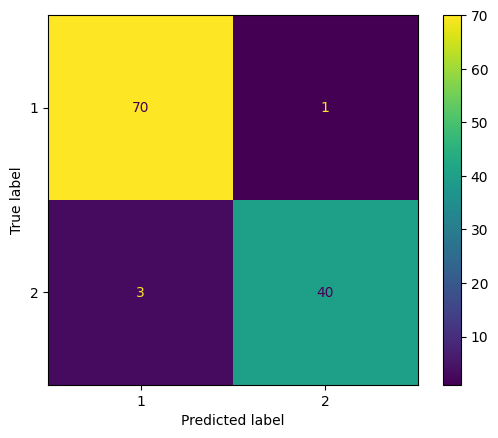

In [20]:
disp_forest = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_forest, display_labels=forest_clf.classes_)
disp_forest.plot()
plt.show()

### 3.5 Cross Val Score

In [21]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.96052632, 0.95394737, 0.93377483])

### 3.6 Roc curve

In [22]:
y_prob_forest = forest_clf.predict_proba(X_test)[:, 1]
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest, pos_label=2)


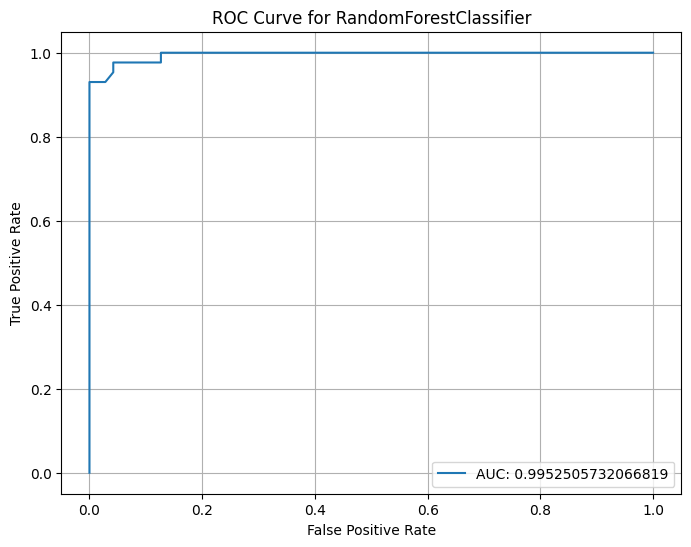

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_forest, tpr_forest, label=f'AUC: {auc(fpr_forest, tpr_forest)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForestClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 3.7 Precision Recall Curve

In [24]:
precision_forest, recall_forest, _ = precision_recall_curve(y_test, y_prob_forest, pos_label=2)

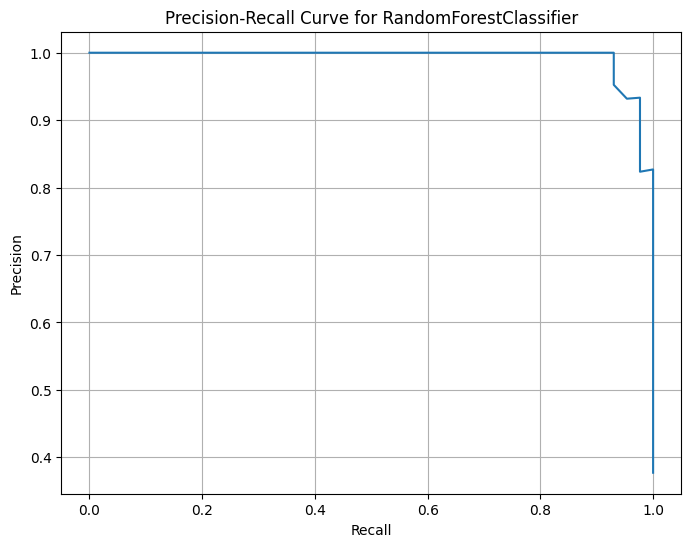

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(recall_forest, precision_forest)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for RandomForestClassifier')
plt.grid()
plt.show()

## K-Nearest Neighbors Classifier

### 4.1 Training the model

In [26]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier(n_neighbors=3)
# knn_clf.fit(X_train, y_train)

In [27]:
# y_pred_knn = knn_clf.predict(X_test)

In [28]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Finding the best value of k using a petal
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_clf, X, y, cv=5)
    scores.append(np.mean(score))

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn_clf = KNeighborsClassifier(n_neighbors=best_k)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [29]:
y_pred_knn = knn_clf.predict(X_test)

### 4.2 Calculation of metrics

In [30]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)

precision_knn = precision_score(y_test, y_pred_knn)

recall_knn = recall_score(y_test, y_pred_knn)

f1_score_knn = f1_score(y_test, y_pred_knn)

confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)



### 4.3 Result of metrics

In [31]:
print(f'Accuracy of knn model: {accuracy_knn}')
print(f'Knn model precision: {precision_knn}')
print(f'Knn model recall: {recall_knn}')
print(f'F1 model knn: {f1_score_knn}')

Accuracy of knn model: 0.9736842105263158
Knn model precision: 0.9594594594594594
Knn model recall: 1.0
F1 model knn: 0.9793103448275862


### 4.4 Confusion Matrix

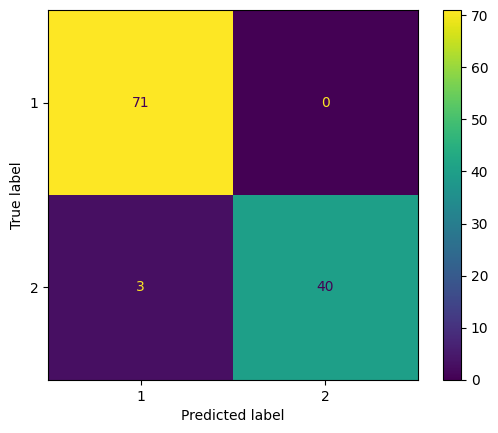

In [32]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=knn_clf.classes_)
disp_knn.plot()
plt.show()

### 4.5 Cross Val Score

In [33]:
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.94078947, 0.93421053, 0.86092715])

### 4.6 Roc curve

In [34]:
# Prawdopodobieństwo przynależności do klasy
y_prob_knn = knn_clf.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn, pos_label=2)


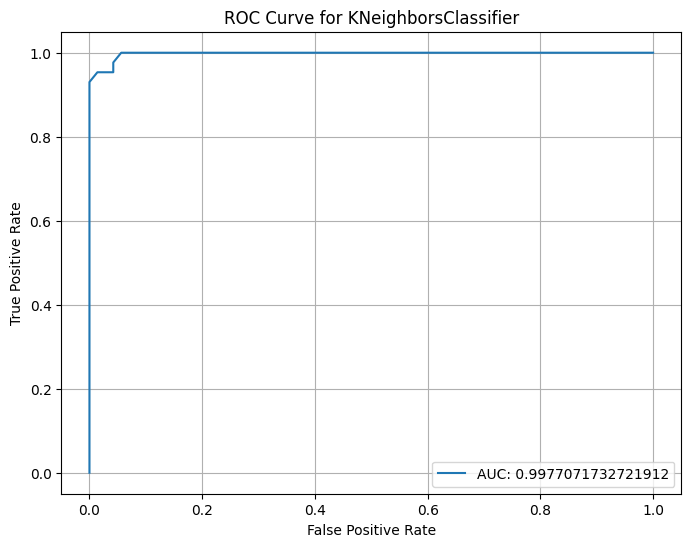

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'AUC: {auc(fpr_knn, tpr_knn)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighborsClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 4.7 Precision Recall Curve

In [36]:
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn, pos_label=2)

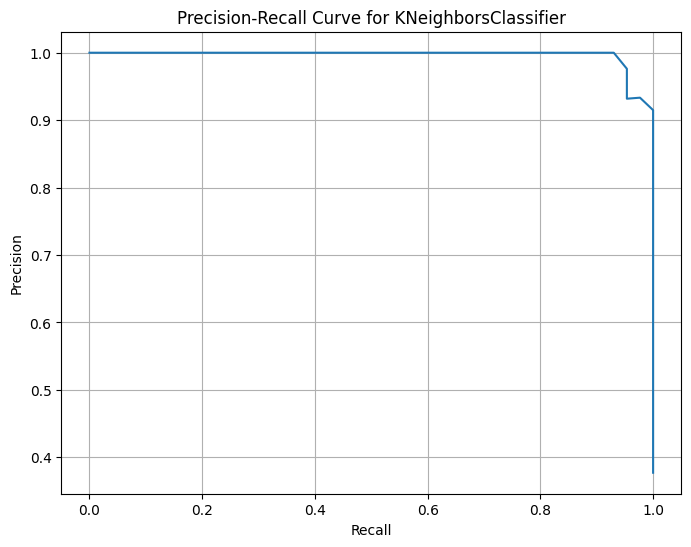

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(recall_knn, precision_knn)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNeighborsClassifier')
plt.grid()
plt.show()

## GaussianProcessClassifier

### 5.1 Training the model

In [38]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.model_selection import RepeatedStratifiedKFold

model = GaussianProcessClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)

print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpc.py", line 742, in fit
    self.base_estimator_.fit(X, y)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpc.py", line 229, in fit
    self._constrained_optimization(
  File "/usr/local/lib/python3.10/dist-package

Best Mean Accuracy: 0.952
Best Config: {'kernel': 1**2 * RationalQuadratic(alpha=1, length_scale=1)}


In [39]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RationalQuadratic


kernel = 1**2 * RationalQuadratic(alpha=1, length_scale=1)
gpc_clf = GaussianProcessClassifier(kernel=kernel, random_state=0)
gpc_clf.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpc.py:477: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessClassifier(kernel=1**2 * RationalQuadratic(alpha=1, length_scale=1),
                          random_state=0)

In [40]:
y_pred_gpc = gpc_clf.predict(X_test)

### 5.2 Calculation of metrics

In [41]:
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)

precision_gpc = precision_score(y_test, y_pred_gpc)

recall_gpc = recall_score(y_test, y_pred_gpc)

f1_score_gpc = f1_score(y_test, y_pred_gpc)

confusion_matrix_gpc = confusion_matrix(y_test, y_pred_gpc)



### 5.3 Result of metrics




In [42]:
print(f'Accuracy of gpc model: {accuracy_gpc}')
print(f'Gpc model precision: {precision_gpc}')
print(f'Gpc model recall: {recall_gpc}')
print(f'F1 model gpc: {f1_score_gpc}')

Accuracy of gpc model: 0.956140350877193
Gpc model precision: 0.9459459459459459
Gpc model recall: 0.9859154929577465
F1 model gpc: 0.9655172413793103


### 5.4 Confusion Matrix

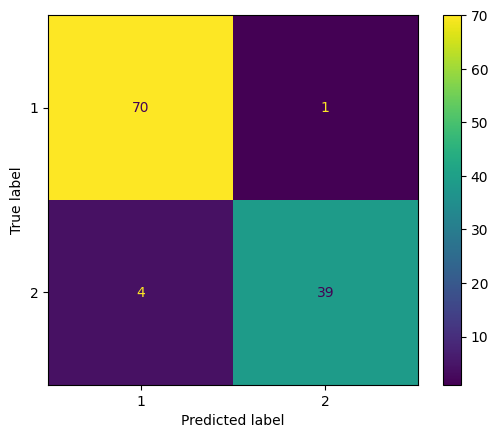

In [43]:
disp_gpc = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_gpc, display_labels=gpc_clf.classes_)
disp_gpc.plot()
plt.show()

### 5.5 Cross Val *Score*

In [44]:
cross_val_score(gpc_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.96710526, 0.95394737, 0.90728477])

### 5.6 Roc curve

In [45]:
y_prob_gpc = gpc_clf.predict_proba(X_test)[:, 1]
fpr_gpc, tpr_gpc, _ = roc_curve(y_test, y_prob_gpc, pos_label=2)


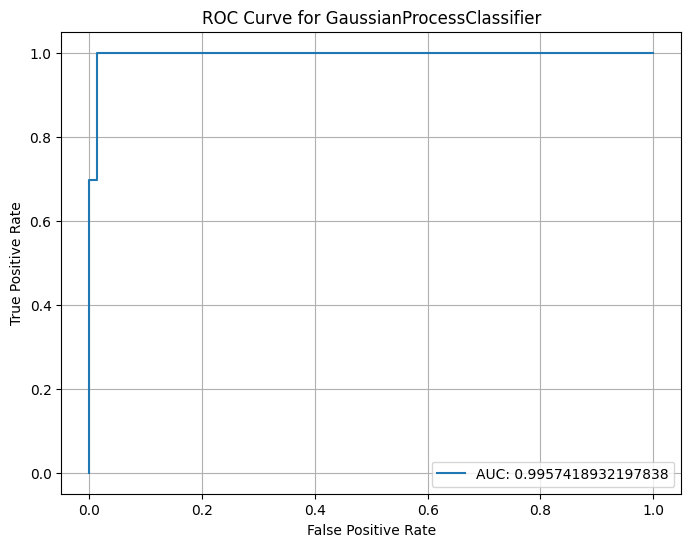

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_gpc, tpr_gpc, label=f'AUC: {auc(fpr_gpc, tpr_gpc)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianProcessClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 5.7 Precision Recall Curve

In [47]:
precision_gpc, recall_gpc, _ = precision_recall_curve(y_test, y_prob_gpc, pos_label=2)

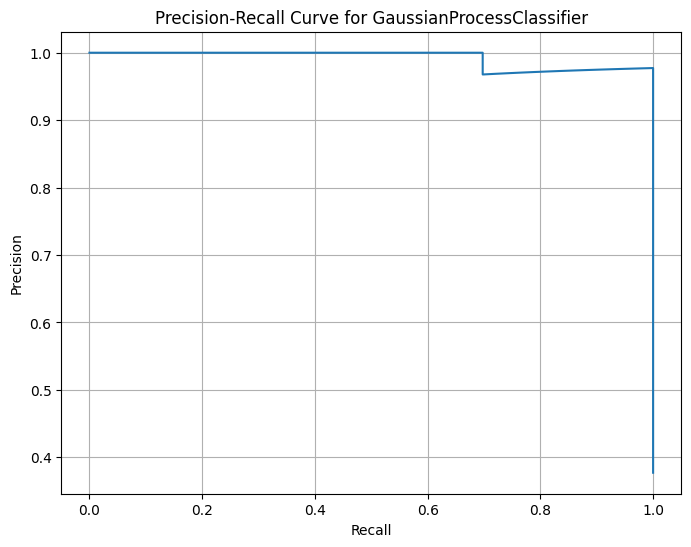

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(recall_gpc, precision_gpc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for GaussianProcessClassifier')
plt.grid()
plt.show()

## MLPClassifier

### 6.1 Training the model

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

sc=StandardScaler()
scaler = sc.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100, 150],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


mlp_clf = MLPClassifier()

grid_mlp_clf = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid_mlp_clf.fit(X_train_scaled, y_train)

print(grid_mlp_clf.best_params_)

y_pred_mlp = grid_mlp_clf.predict(X_test_scaled)


{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 50, 'solver': 'adam'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


### 6.2 Calculation of metric

In [50]:
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

precision_mlp = precision_score(y_test, y_pred_mlp)

recall_mlp = recall_score(y_test, y_pred_mlp)

f1_score_mlp = f1_score(y_test, y_pred_mlp)

confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)



### 6.3 Result of metrics

In [51]:
print(f'Accuracy of mlp model: {accuracy_sgd}')
print(f'Mlp model precision: {precision_sgd}')
print(f'Mlp model recall: {recall_sgd}')
print(f'F1 model mlp: {f1_score_sgd}')

Accuracy of mlp model: 0.956140350877193
Mlp model precision: [0.37719298 0.95238095 1.        ]
Mlp model recall: [1.         0.93023256 0.        ]
F1 model mlp: 0.965034965034965


### 6.4 Confusion Matrix

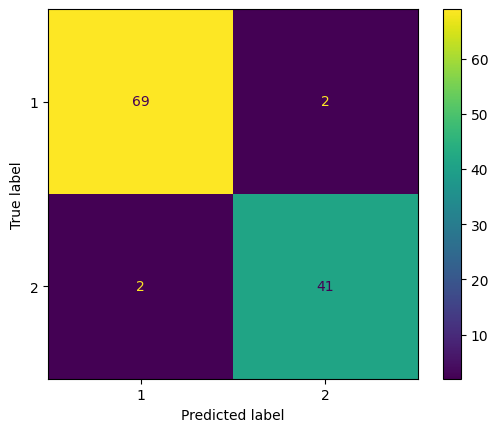

In [52]:
disp_MLP = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_mlp, display_labels=grid_mlp_clf.classes_)
disp_MLP.plot()
plt.show()

### 6.5 Roc Curve

In [53]:
y_prob_mlp = grid_mlp_clf.predict_proba(X_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp, pos_label=2)


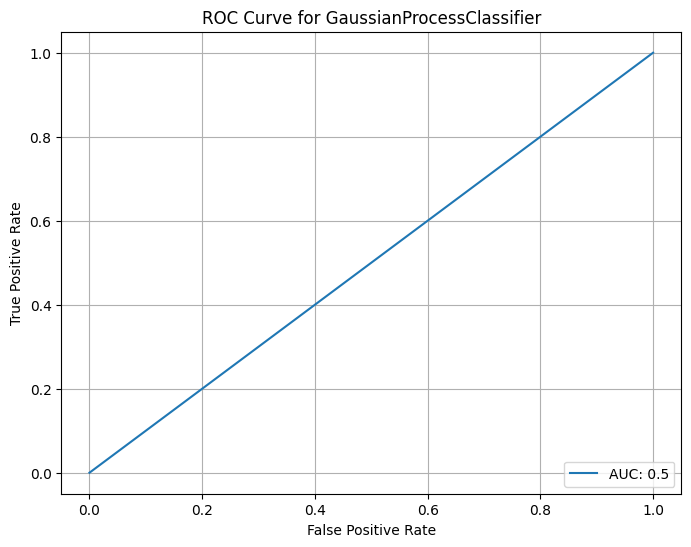

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_mlp, tpr_mlp, label=f'AUC: {auc(fpr_mlp, tpr_mlp)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GaussianProcessClassifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### 6.6 Precision Recall Curve

## Model comparison

### 7.1 ROC Curve Comparison

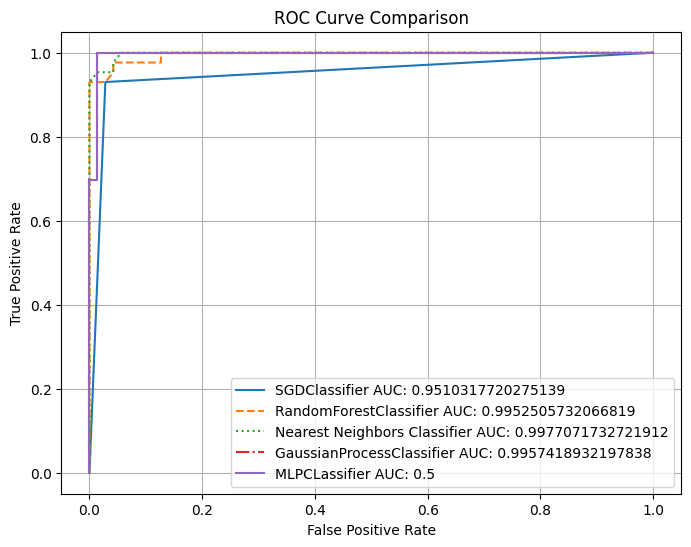

In [55]:
plt.figure(figsize=(8, 6))

# Chart for SGDClassifier
plt.plot(fpr_sgd, tpr_sgd, label=f'SGDClassifier AUC: {auc(fpr_sgd, tpr_sgd)}')

# Chart for RandomForestClassifier
plt.plot(fpr_forest, tpr_forest, label=f'RandomForestClassifier AUC: {auc(fpr_forest, tpr_forest)}', linestyle='--')

# Chart for K-Nearest Neighbors Classifier
plt.plot(fpr_knn, tpr_knn, label=f'Nearest Neighbors Classifier AUC: {auc(fpr_knn, tpr_knn)}', linestyle=':')

# Chart for GaussianProcessClassifier
plt.plot(fpr_gpc, tpr_gpc, label=f'GaussianProcessClassifier AUC: {auc(fpr_gpc, tpr_gpc)}', linestyle='-.')

# Chart for MLPCLassifier
plt.plot(fpr_gpc, tpr_gpc, label=f'MLPCLassifier AUC: {auc(fpr_mlp, tpr_mlp)}', linestyle='-')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### 7.2 Precision Recall Curve Comparison

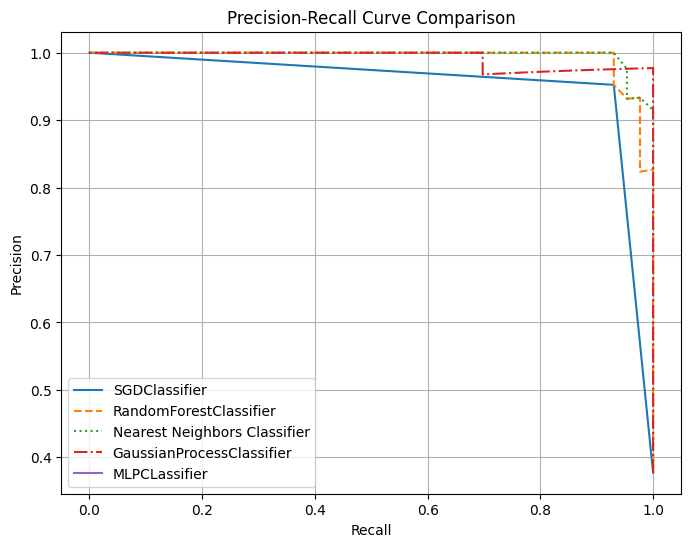

In [56]:
plt.figure(figsize=(8, 6))

# Chart for SGDClassifier
plt.plot(recall_sgd, precision_sgd, label='SGDClassifier')

# Chart for RandomForestClassifier
plt.plot(recall_forest, precision_forest, label='RandomForestClassifier', linestyle='--')

# Chart for K-Nearest Neighbors Classifier
plt.plot(recall_knn, precision_knn, label='Nearest Neighbors Classifier', linestyle=':')

# Chart for GaussianProcessClassifier
plt.plot(recall_gpc, precision_gpc, label='GaussianProcessClassifier', linestyle='-.')

# Chart for MLPCLassifier
plt.plot(recall_mlp, precision_mlp, label='MLPCLassifier', linestyle='-')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.grid()
plt.legend()
plt.show()
